https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from IPython.display import Image

In [2]:
fruits = pd.read_table('fruits.txt')

In [3]:
fruits['fruit_name'].value_counts()

orange      19
apple       19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [4]:
fruits.corr()

,fruit_label,mass,width,height,color_score
fruit_label,1.000000,0.032738,-0.298090,0.508766,-0.310521
mass,0.032738,1.000000,0.877687,0.609571,-0.079794
width,-0.298090,0.877687,1.000000,0.396848,-0.076576
height,0.508766,0.609571,0.396848,1.000000,-0.247047
color_score,-0.310521,-0.079794,-0.076576,-0.247047,1.000000


In [5]:
cols = list(fruits.columns)
print(cols)

['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height', 'color_score']


In [8]:
X = fruits.loc[:, cols[3:]]
y = fruits.loc[:, cols[0]]

In [9]:
X.head(4)

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80


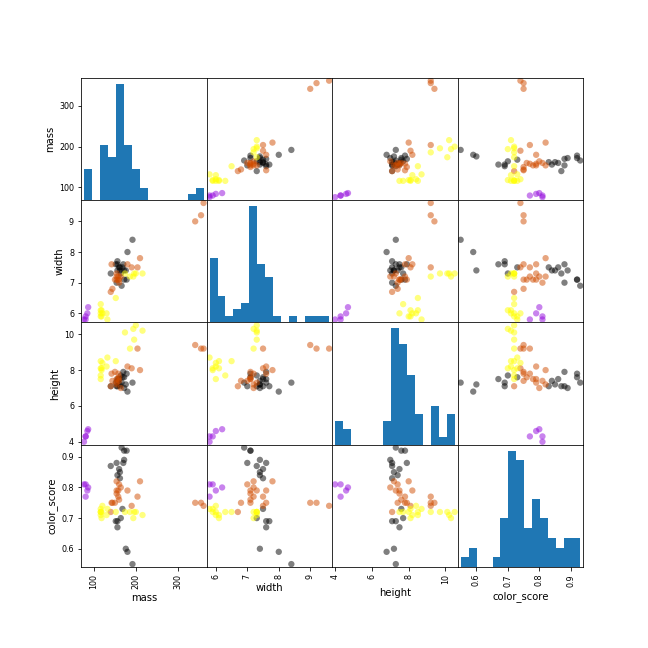

In [16]:
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.savefig('fruits_scatter_matrix')
Image('fruits_scatter_matrix.png')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [18]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

In [25]:
algrtms = [LinearRegression(), DecisionTreeClassifier(), SVC(), GaussianNB()]
label = ['Linear Regression', 'Decision Tree', 'SVM', 'GaussianNB']

In [26]:
results = {}

In [28]:
for a, l in zip(algrtms, label):
    z = a
    z.fit(X_train, y_train)
    results[str(l) + ' train'] = z.score(X_train, y_train)
    results[str(l) + ' test'] = z.score(X_test, y_test)
    print(f'''
    train score for {l}: {z.score(X_train, y_train)} 
    test score for {l}: {z.score(X_test, y_test)}
    ''')


    train score for Linear Regression: 0.7188765896982534 
    test score for Linear Regression: 0.3967293102732976
    

    train score for Decision Tree: 1.0 
    test score for Decision Tree: 0.8666666666666667
    

    train score for SVM: 0.45454545454545453 
    test score for SVM: 0.2
    

    train score for GaussianNB: 0.8181818181818182 
    test score for GaussianNB: 0.9333333333333333
    


In [29]:
results

{'Decision Tree test': 0.8666666666666667,
 'Decision Tree train': 1.0,
 'GaussianNB test': 0.93333333333333335,
 'GaussianNB train': 0.81818181818181823,
 'Linear Regression test': 0.39672931027329761,
 'Linear Regression train': 0.71887658969825341,
 'SVM test': 0.20000000000000001,
 'SVM train': 0.45454545454545453}